In [264]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})

In [265]:
m_ratios =  [0.00, 0.05, 0.10, 0.20]
Qs_ratios = [1.08, 0.98, 0.85, 0.68]
hbarc = 0.197

# load the data
fns = ["m_ratio_{:3.2f}_set_3".format(mr) for mr in m_ratios]
ress = []
for fn in fns:
    res = pickle.load(open("./{}.pickle".format(fn), "rb"))
    ress.append(res)

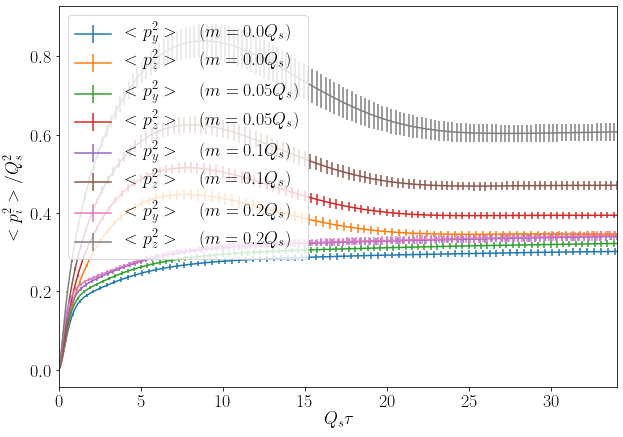

In [270]:
Qs_ratios = [1.08, 0.98, 0.85, 0.68]
for i, r in enumerate(ress):
    g2mu = 1.0
    Qs = Qs_ratios[i] * g2mu
    plt.errorbar(Qs * r["tau"] / hbarc, r["p_qhat"][:, 1] / Qs ** 2, yerr=r["p_qhat_std"][:, 1] / Qs ** 2, fmt='-', errorevery=4)
    plt.errorbar(Qs * r["tau"] / hbarc, r["p_qhat"][:, 2] / Qs ** 2, yerr=r["p_qhat_std"][:, 2] / Qs ** 2, fmt='-', errorevery=4)

m_ratios =  [0.00, 0.05, 0.10, 0.20]

plt.xlabel("$Q_s \\tau$")
plt.ylabel("$<p_i^2> / Q_s^2$")
plt.xlim([0, 34])
legend = [["$<p_y^2> \quad (m = {} Q_s)$".format(m), "$<p_z^2> \quad (m = {} Q_s)$".format(m)] for m in m_ratios]
legend = np.array(legend).flatten()
plt.legend(legend)
plt.show()

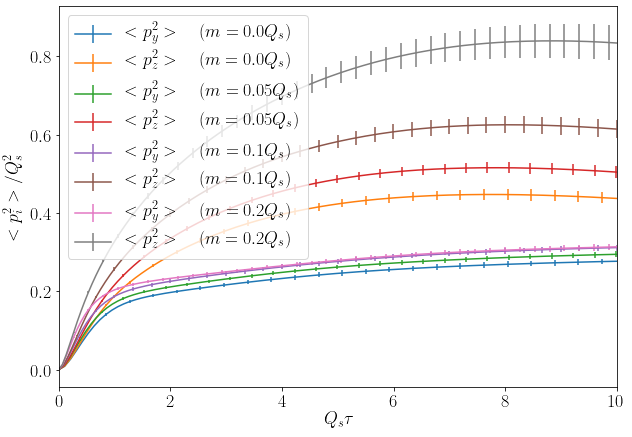

In [25]:
Qs_ratios = [1.08, 0.98, 0.85, 0.68]
for i, r in enumerate(ress):
    g2mu = 1.0
    Qs = Qs_ratios[i] * g2mu
    tau = Qs * r["tau"] / hbarc
    plt.errorbar(tau, r["p_qhat"][:, 1] / Qs ** 2, yerr=r["p_qhat_std"][:, 1] / Qs ** 2, fmt='-', errorevery=4)
    plt.errorbar(tau, r["p_qhat"][:, 2] / Qs ** 2, yerr=r["p_qhat_std"][:, 2] / Qs ** 2, fmt='-', errorevery=4)


plt.xlabel("$Q_s \\tau$")
plt.ylabel("$<p_i^2> / Q_s^2$")
plt.xlim([0, 10])
legend = [["$<p_y^2> \quad (m = {} Q_s)$".format(m), "$<p_z^2> \quad (m = {} Q_s)$".format(m)] for m in m_ratios]
legend = np.array(legend).flatten()
plt.legend(legend)
plt.show()

# Plot 1: Accumulated transverse momentum as a function of saturation momentum

In [100]:
import scipy.interpolate

Qs_range = np.linspace(1.0, 3.5, num=200)
Qs_ratios = [1.08, 0.98, 0.85, 0.68]

tau_0 = 0.6
PY = []
PZ = []
p_perp = []

for i, r in enumerate(ress):
    # first, create interpolation functions in units of Qs
    g2mu = 1.0
    Qs = Qs_ratios[i] * g2mu

    tau = Qs * r["tau"] / hbarc
    py = r["p_qhat"][:, 1] / Qs ** 2
    pz = r["p_qhat"][:, 2] / Qs ** 2

    pye = r["p_qhat_std"][:, 1] / Qs ** 2
    pze = r["p_qhat_std"][:, 2] / Qs ** 2

    py_i = scipy.interpolate.interp1d(tau, py)
    pz_i = scipy.interpolate.interp1d(tau, pz)
    pye_i = scipy.interpolate.interp1d(tau, pye)
    pze_i = scipy.interpolate.interp1d(tau, pze)
    
    # pick <p^2> by fixing tau and Q:
    for q in Qs_range:
        dimless_tau = q * tau_0 / hbarc
        py_q = q ** 2 * py_i(dimless_tau)
        pz_q = q ** 2 * pz_i(dimless_tau)
        PY.append(py_q)
        PZ.append(pz_q)

PY, PZ = np.array(PY), np.array(PZ)
PY = PY.reshape(len(ress), len(Qs_range))
PZ = PZ.reshape(len(ress), len(Qs_range))

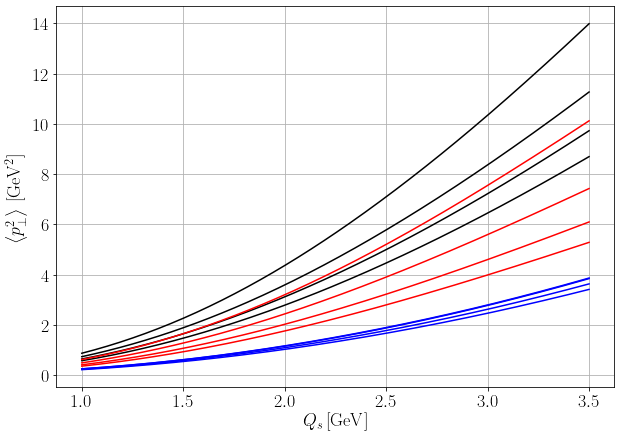

In [101]:
for i in range(len(ress)):
    plt.plot(Qs_range, PY[i, :], 'b')
    plt.plot(Qs_range, PZ[i, :], 'r')
    plt.plot(Qs_range, PY[i, :] + PZ[i, :], 'black')
plt.grid()
plt.xlabel("$Q_s  \, [\\mathrm{GeV}]$")
plt.ylabel("$\\left< p^2_\\perp \\right> \, [\\mathrm{GeV}^2]$")
plt.show()

In [102]:
# export for pgfplots
X = [Qs_range]
for i in range(len(ress)):
    X.append(PY[i, :])
    X.append(PZ[i, :])
    X.append(PY[i, :] + PZ[i, :])
X = np.array(X).T
np.savetxt("psquared_Qs.dat", X, header="Qs [GeV], (<p^2_y> [GeV^2], <p^2_z> [GeV^2], <p^2_\perp> [GeV^2]) x 4")

# Plot 2: Momentum broadening anisotropy as a function of saturation momentum

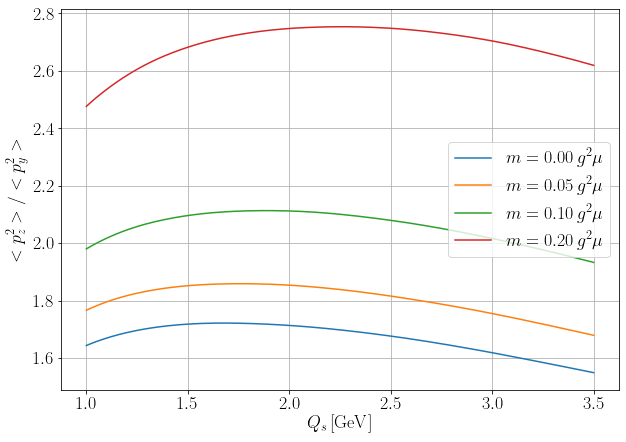

In [108]:
X = [Qs_range]
for i in range(len(ress)):
    plt.plot(Qs_range, PZ[i, :] / PY[i, :])
    X.append(PZ[i, :] / PY[i, :])
plt.grid()
legend = ["$m = {:3.2f} \, g^2 \mu $".format(m) for m in m_ratios]
legend = np.array(legend).flatten()
plt.legend(legend)
plt.xlabel("$Q_s  \, [\\mathrm{GeV}]$")
plt.ylabel("$<p_z^2> / <p_y^2>$")
plt.show()

np.savetxt("anisotropy_Qs.dat", np.array(X).T, header="Qs [GeV], (<p^2_z> / <p^2_y>) x 4")

# Plot 3: Jet broadening parameter as a function of proper time

We fix the saturation momentum to an intermediate value of $Q_s = 1.5 \, \mathrm{GeV}$ and plot both the instantaneous jet broadening parameter $\hat{q} = d \langle p_\perp^2 \rangle / d\tau$ and the time-averaged broadening parameter $\overline{\hat{q}} = \langle p_\perp^2 \rangle / \tau $ as a function of $\tau$. 

p_\perp [GeV^2] at 0.6 fm/c: 2.783752147115902
p_\perp [GeV^2] at 0.6 fm/c: 3.114842435284479
p_\perp [GeV^2] at 0.6 fm/c: 3.58893400408184
p_\perp [GeV^2] at 0.6 fm/c: 4.362871545067306


/home/dmueller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/home/dmueller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


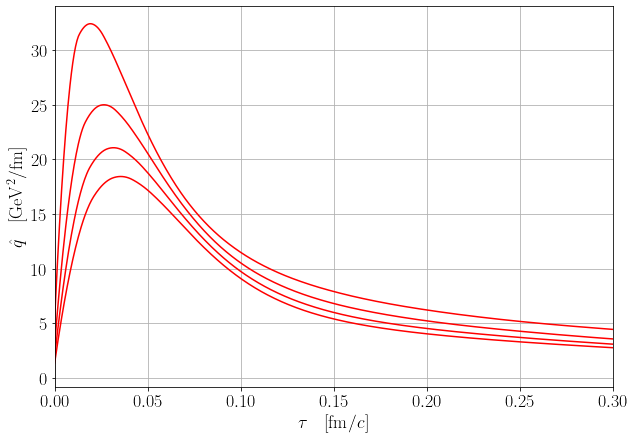

In [263]:
import scipy.interpolate
import scipy.integrate

Q0 = 2 # GeV
Qs_ratios = [1.08, 0.98, 0.85, 0.68]

new_tau = np.linspace(0.0, 0.6, num=1600)
skip = int(len(new_tau) / 200) # for exporting to tables

X = [new_tau[::skip]]
for i, r in enumerate(ress):
    g2mu = 1.0
    Qs = Qs_ratios[i] * g2mu
    tau = Qs * r["tau"] / hbarc / (Q0 / hbarc)
    py = r["p_qhat"][:, 1] / Qs ** 2 * Q0 ** 2
    pz = r["p_qhat"][:, 2] / Qs ** 2 * Q0 ** 2
    
    # instantaneous jet broadening parameter
    py_int = scipy.interpolate.splrep(tau, py)
    pz_int = scipy.interpolate.splrep(tau, pz)
    q_y = scipy.interpolate.splev(new_tau, py_int, der=1)
    q_z = scipy.interpolate.splev(new_tau, pz_int, der=1)

    # time-averaged jet broadening parameter
    dtau = new_tau[1] - new_tau[0]
    qa = np.cumsum(new_tau * (q_y + q_z)) * (2.0 / new_tau ** 2) * dtau
                   
    plt.plot(new_tau, q_y + q_z, 'r')
    #plt.plot(new_tau, qa, 'b')
    X.append((q_y + q_z)[::skip])
    X.append(qa[::skip])
    
    # sanity check
    i_max = np.argmin(np.abs(0.6 - new_tau))
    pperp = scipy.integrate.trapz((q_y+q_z)[:i_max], new_tau[:i_max])
    print("p_\perp [GeV^2] at 0.6 fm/c:", pperp)

plt.xlabel("$\\tau \quad [\mathrm{fm} / c]$")
plt.ylabel("$\\hat{q} \quad [\mathrm{GeV}^2 / \mathrm{fm}]$")
plt.grid()
plt.xlim([0, 0.3])
plt.show()

np.savetxt("qhat_tau.dat", np.array(X).T, header="tau [fm/c], (inst. qhat [GeV^2 / fm], avg. qhat [GeV^2 / fm]) x 4")

p_\perp [GeV^2] at 0.6 fm/c: 1.4708938834235241
p_\perp [GeV^2] at 0.6 fm/c: 1.6453356475501766
p_\perp [GeV^2] at 0.6 fm/c: 1.8852638820235967
p_\perp [GeV^2] at 0.6 fm/c: 2.2626961214606993


/home/dmueller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/home/dmueller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


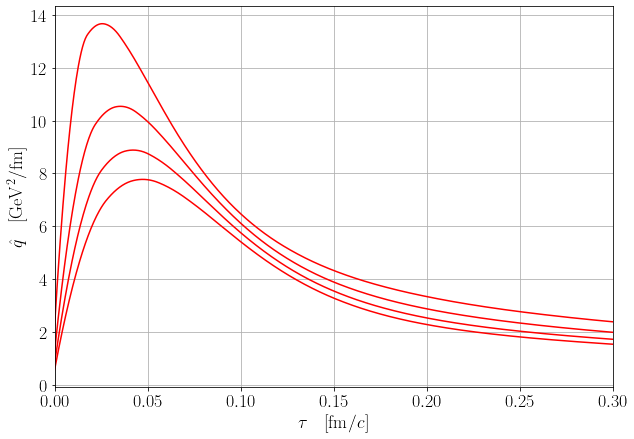

In [262]:
import scipy.interpolate
import scipy.integrate

Q0 = 1.5 # GeV
Qs_ratios = [1.08, 0.98, 0.85, 0.68]

new_tau = np.linspace(0.0, 0.6, num=1600)
skip = int(len(new_tau) / 200) # for exporting to tables

X = [new_tau[::skip]]
for i, r in enumerate(ress):
    g2mu = 1.0
    Qs = Qs_ratios[i] * g2mu
    tau = Qs * r["tau"] / hbarc / (Q0 / hbarc)
    py = r["p_qhat"][:, 1] / Qs ** 2 * Q0 ** 2
    pz = r["p_qhat"][:, 2] / Qs ** 2 * Q0 ** 2
    
    # instantaneous jet broadening parameter
    py_int = scipy.interpolate.splrep(tau, py)
    pz_int = scipy.interpolate.splrep(tau, pz)
    q_y = scipy.interpolate.splev(new_tau, py_int, der=1)
    q_z = scipy.interpolate.splev(new_tau, pz_int, der=1)

    # time-averaged jet broadening parameter
    dtau = new_tau[1] - new_tau[0]
    qa = np.cumsum(new_tau * (q_y + q_z)) * (2.0 / new_tau ** 2) * dtau
                   
    plt.plot(new_tau, q_y + q_z, 'r')
    #plt.plot(new_tau, qa, 'b')
    X.append((q_y + q_z)[::skip])
    X.append(qa[::skip])
    
    
    # sanity check
    i_max = np.argmin(np.abs(0.6 - new_tau))
    pperp = scipy.integrate.trapz((q_y+q_z)[:i_max], new_tau[:i_max])
    print("p_\perp [GeV^2] at 0.6 fm/c:", pperp)


plt.xlabel("$\\tau \quad [\mathrm{fm} / c]$")
plt.ylabel("$\\hat{q} \quad [\mathrm{GeV}^2 / \mathrm{fm}]$")
plt.xlim([0, 0.3])
plt.grid()
plt.show()

np.savetxt("qhat_tau2.dat", np.array(X).T, header="tau [fm/c], (inst. qhat [GeV^2 / fm], avg. qhat [GeV^2 / fm]) x 4")

In [258]:
import scipy.interpolate
import scipy.integrate

Q0 = 1.5
Qs_ratios = [1.08, 0.98, 0.85, 0.68]
new_tau = np.linspace(0.0, 0.8, num=1600)
skip = int(len(new_tau) / 200) # for exporting to tables

X = [new_tau[::skip]]
for i, r in enumerate(ress):
    g2mu = 1.0
    Qs = Qs_ratios[i] * g2mu
    tau = Qs * r["tau"] / hbarc / (Q0 / hbarc)
    py = r["p_qhat"][:, 1] / Qs ** 2 * Q0 ** 2
    pz = r["p_qhat"][:, 2] / Qs ** 2 * Q0 ** 2
    
    # instantaneous jet broadening parameter
    py_int = scipy.interpolate.splrep(tau, py)
    pz_int = scipy.interpolate.splrep(tau, pz)
    q_y = scipy.interpolate.splev(new_tau, py_int, der=1)
    q_z = scipy.interpolate.splev(new_tau, pz_int, der=1)

    qhat_max = np.max(q_y + q_z)
    tau_max = new_tau[np.argmax(q_y + q_z)]
    print("{} GeV^2/fm at \\tau = {} fm/c".format(qhat_max, tau_max))
    

7.775315303169444 GeV^2/fm at \tau = 0.047529706066291436 fm/c
8.886550118994938 GeV^2/fm at \tau = 0.04202626641651032 fm/c
10.544995839676677 GeV^2/fm at \tau = 0.035522201375859916 fm/c
13.676986555987568 GeV^2/fm at \tau = 0.02551594746716698 fm/c
